<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/doenca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificação: regressão logística com sklearn

In [0]:
import pandas as pd #biblioteca para processamento de dados
import numpy as np #biblioteca para computação científica
import matplotlib.pyplot as plt #gráficos
from sklearn.linear_model import LogisticRegression #Modelo de regresão logística
from sklearn.metrics import accuracy_score #acurácia


Carregar diretamente o dataframe via url


In [18]:
df = pd.read_csv('http://linkededucation.com.br/dl/doenca.csv', delimiter=';')

df.head()

,colest,Triglic,Doenca
0,2,20,1
1,3,15,1
2,8,12,1
3,7,14,1
4,15,10,1


Verificar possível separabilidade linear



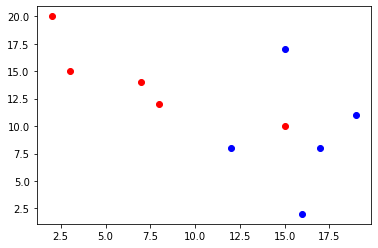

In [19]:
# Não separável 100% linearmente

for i in range(len(df)):
  if df.iloc[i, 2] == 1: plt.plot(df.iloc[i, 0], df.iloc[i, 1], 'ro')
  else: plt.plot(df.iloc[i, 0], df.iloc[i, 1], 'bo')

plt.show()

Criar o target y como a série Doenca do dataframe
Retirar a série Doenca do dataframe


In [20]:
y = df['Doenca']
df = df.drop(columns='Doenca', axis=1)

y

0    1
1    1
2    1
3    1
4    1
5    0
6    0
7    0
8    0
9    0
Name: Doenca, dtype: int64

Converter dataframe e tagret para arrays (X e y)

In [21]:
X = np.array(df)
y = np.array(y)

X, y

(array([[ 2, 20],
        [ 3, 15],
        [ 8, 12],
        [ 7, 14],
        [15, 10],
        [12,  8],
        [15, 17],
        [17,  8],
        [16,  2],
        [19, 11]]), array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0]))

Instanciar Modelo de Regressão Logística
Treiná-lo (fit)
Gerar predição para todo o dataset (ye)
Verificar acurácia na amostra de treinamento (toda a amostra)

In [22]:
model = LogisticRegression()
model.fit(X, y)
ye = model.predict(X)

str(accuracy_score(y, ye) * 100) + '%'

'90.0%'

Criar no Dataframe novas séries com valores previstos e reais para comparação

In [24]:
df['y'] = y
df ['ye'] = ye

df

,colest,Triglic,y,ye
0,2,20,1,1
1,3,15,1,1
2,8,12,1,1
3,7,14,1,1
4,15,10,1,0
5,12,8,0,0
6,15,17,0,0
7,17,8,0,0
8,16,2,0,0
9,19,11,0,0
